<a href="https://colab.research.google.com/github/adriendod/Color_Classification/blob/master/Color_FastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!nvidia-smi

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/gdrive/My Drive/Data Science/Projets/Car_color_classification/data.zip" -d "/content"

In [0]:
path = "/content/data"

In [0]:
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().transform(tfms, size=224).databunch())

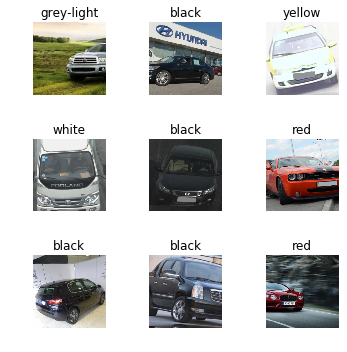

In [22]:
data.show_batch(rows=3, figsize=(5,5))

In [23]:
print(data.classes)
len(data.classes),data.c

['black', 'blue', 'cyan', 'green', 'grey-light', 'grey-other', 'notACar', 'red', 'white', 'yellow']


(10, 10)

In [24]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.508657,0.359406,0.874123,14:37
1,0.382002,0.278361,0.903207,14:32
2,0.318979,0.237219,0.917462,14:16
3,0.293667,0.230937,0.920106,14:25


In [0]:
learn.save('stage-1')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

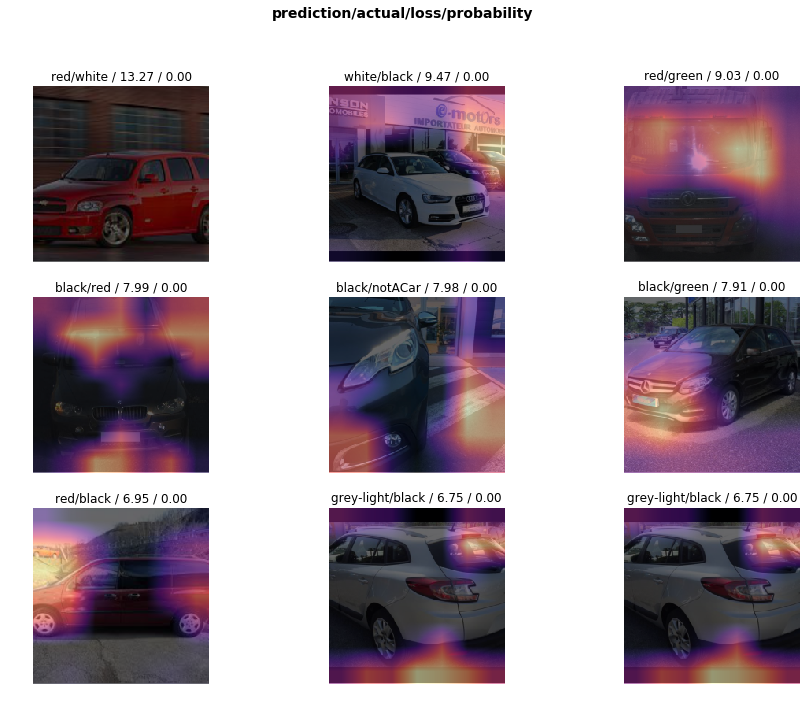

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

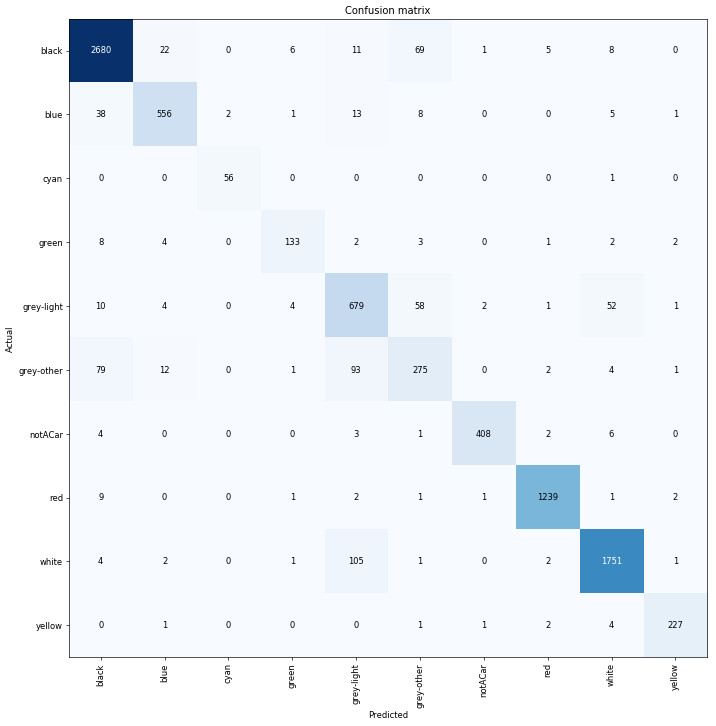

In [28]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
interp.most_confused(min_val=2)

[('white', 'grey-light', 105),
 ('grey-other', 'grey-light', 93),
 ('grey-other', 'black', 79),
 ('black', 'grey-other', 69),
 ('grey-light', 'grey-other', 58),
 ('grey-light', 'white', 52),
 ('blue', 'black', 38),
 ('black', 'blue', 22),
 ('blue', 'grey-light', 13),
 ('grey-other', 'blue', 12),
 ('black', 'grey-light', 11),
 ('grey-light', 'black', 10),
 ('red', 'black', 9),
 ('black', 'white', 8),
 ('blue', 'grey-other', 8),
 ('green', 'black', 8),
 ('black', 'green', 6),
 ('notACar', 'white', 6),
 ('black', 'red', 5),
 ('blue', 'white', 5),
 ('green', 'blue', 4),
 ('grey-light', 'blue', 4),
 ('grey-light', 'green', 4),
 ('grey-other', 'white', 4),
 ('notACar', 'black', 4),
 ('white', 'black', 4),
 ('yellow', 'white', 4),
 ('green', 'grey-other', 3),
 ('notACar', 'grey-light', 3),
 ('blue', 'cyan', 2),
 ('green', 'grey-light', 2),
 ('green', 'white', 2),
 ('green', 'yellow', 2),
 ('grey-light', 'notACar', 2),
 ('grey-other', 'red', 2),
 ('notACar', 'red', 2),
 ('red', 'grey-light', 2

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


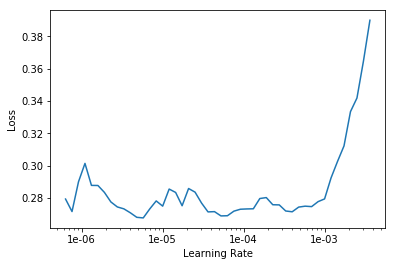

In [32]:
learn.load('stage-1');
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.259657,0.203207,0.929187,14:33
1,0.215972,0.190573,0.935740,14:39


In [34]:
learn.validate()

[0.19057293, tensor(0.9357)]

In [35]:
learn.save('stage-2', return_path=True)

PosixPath('/content/data/models/stage-2.pth')

In [0]:
cp -a "/content/data/models/." "/content/gdrive/My Drive/Data Science/Projets/Car_color_classification"